## Auto Tag / Classify Tracks
![](../images/pop-music-57bce3863df78c87634ea806.jpg)

**OVERVIEW**

The provided dataset contains information over 302K tracks.  The goal is to understand which audio feature drives every category.  As a result, the model should be able to predict the category/categories each track will belong to.

### CRISP-DM Framework

<center>
    <img src = ../images/CRISP-DM.png width = 50%/>
</center>


To come up with a working model we will start with industrial standard CRISP-DM approach.


Here the first step **_Bussiness Understanding_** is already discussed above.

### Data Understanding

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
from IPython.display import IFrame

from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

##### Note :

- As github has file limit of 25 MB,  the data is split into multiple chunks.
- Call getAllTracks() function to store data on your system.

In [2]:
def getAllTracks():
    tracks = pd.read_csv('./data/divided/tracks_1')
    for index in range(2,48):
        temp = pd.read_csv('../data/divided/tracks_'+str(index))
        tracks = pd.concat([tracks,temp])
    return tracks

#### Run the below block for the first time.

In [3]:
#tracks = getAllTracks()
#tracks.to_csv('../data/tracks.csv') 

In [4]:
tracks = pd.read_csv('../data/tracks.csv') 

In [5]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302542 entries, 0 to 302541
Data columns (total 38 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   album_name         302349 non-null  object 
 1   track_href         300137 non-null  object 
 2   loudness           302542 non-null  float64
 3   liveness           302542 non-null  float64
 4   album_id           302542 non-null  object 
 5   tempo              302542 non-null  float64
 6   episode            302542 non-null  bool   
 7   type               302542 non-null  object 
 8   danceability       302542 non-null  float64
 9   mode               302542 non-null  int64  
 10  popularity         302542 non-null  int64  
 11  album_type         302542 non-null  object 
 12  track_href.1       302542 non-null  object 
 13  track_id           302542 non-null  object 
 14  is_local           302542 non-null  bool   
 15  track              302542 non-null  bool   
 16  an

In [6]:
categories =  pd.read_csv('../data/categories.csv')

In [7]:
categories.duplicated().value_counts()

False    1604
True      214
dtype: int64

In [8]:
categories.drop_duplicates(inplace=True)

In [9]:
categories.duplicated().value_counts()

False    1604
dtype: int64

In [10]:
categories.groupby(['playlist_id','category_id','category_name']).size()

playlist_id             category_id             category_name   
0Xb9zZnc2MHkRocj5kqPWU  0JQ5DAqbMKFLb2EqgLtpjC  Wellness            1
37i9dQZF1DWSADWNdZfn11  0JQ5DAqbMKFLb2EqgLtpjC  Wellness            1
                        0JQ5DAqbMKFRieVZLLoo9m  Instrumental        1
37i9dQZF1DWSAqa5cw6DxQ  0JQ5DAqbMKFLb2EqgLtpjC  Wellness            1
                        0JQ5DAqbMKFRieVZLLoo9m  Instrumental        1
                                                                   ..
37i9dQZF1EFLCxccHYZAKZ  0JQ5DAqbMKFOOxftoKZxod  RADAR               1
37i9dQZF1EFSipnR79Y2Xq  0JQ5DAqbMKFOOxftoKZxod  RADAR               1
37i9dQZF1EFzML3sgXnWTr  0JQ5DAqbMKFOOxftoKZxod  RADAR               1
4c0FH7ppMiVUJ8DB5zbfZg  0JQ5DAqbMKFAEu5QlAkwvV  Indian Classical    1
4lDX4W8iQAm0hTVV6TfGpp  0JQ5DAqbMKFAEu5QlAkwvV  Indian Classical    1
Length: 1598, dtype: int64

In [11]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604 entries, 0 to 1817
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   description             1596 non-null   object
 1   playlist_external_urls  1598 non-null   object
 2   playlist_href           1598 non-null   object
 3   playlist_id             1598 non-null   object
 4   images                  1598 non-null   object
 5   playlist_name           1598 non-null   object
 6   playlist_owner          1598 non-null   object
 7   snapshot_id             1598 non-null   object
 8   tracks                  1598 non-null   object
 9   type                    1598 non-null   object
 10  playlist_uri            1598 non-null   object
 11  category_name           1604 non-null   object
 12  category_id             1604 non-null   object
dtypes: object(13)
memory usage: 175.4+ KB


In [12]:
categories.category_name.unique()

array(['Indie', 'Gaming', 'EQUAL', 'Pop', 'RADAR', 'Wellness',
       'Devotional', 'Indian Classical', 'Romance', 'Hip-Hop', 'Party',
       'Instrumental', 'Dance/Electronic', 'Chill', 'Mood', 'Workout',
       'Folk & Acoustic', 'Sleep', 'Kids & Family', 'At Home', 'R&B',
       'Rock', 'Focus', 'Summer', 'Cooking & Dining', 'Jazz', 'Classical',
       'Metal', 'Travel'], dtype=object)

### Data Preparation

##### Steps taken :
1. Merge the categories file and tracks file on playlist_id.
2. Extract required features from data.
3. Check for null - if relevant fields are null remove them.
4. Check for duplicated data,remove duplicated data.


In [13]:
def mergeData(categories,tracks):
    print("Merging Data.")
    pd.merge(tracks, categories, how='inner',left_on="playlist_id", right_on="playlist_id")
    data.rename(columns = {'type_y':'playlist_type','type_x':'track_type'},inplace=True)
    return data


In [14]:
try :
    print("Reading Master Data.")
    master_data = pd.read_csv('../data/merged_data.csv')
except FileNotFoundError:
    print("File not found!")
    master_data = mergeData(categories,tracks)
    
master_data.describe()

Reading Master Data.


loudness       liveness          tempo   danceability  \
count  292087.000000  292087.000000  292087.000000  292087.000000   
mean      -14.816588       0.186672     110.087814       0.475902   
std        10.838530       0.182038      34.985810       0.243187   
min       -53.814000       0.000000       0.000000       0.000000   
25%       -22.021000       0.097600      85.571000       0.240000   
50%       -10.485000       0.112000     110.005000       0.513000   
75%        -6.318000       0.195000     132.752000       0.672000   
max         1.511000       0.991000     220.024000       0.998000   

                mode     popularity            key         energy  \
count  292087.000000  292087.000000  292087.000000  292087.000000   
mean        0.651614      48.613509       4.940511       0.451467   
std         0.476460      16.786943       3.585849       0.323569   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000      38.000000       1.000000       0.115000   
50%         1.000000      49.000000       5.000000       0.481000   
75%         1.000000      60.000000       8.000000       0.733000   
max         1.000000     100.000000      11.000000       1.000000   

       time_signature    disc_number        valence  instrumentalness  \
count   292087.000000  292087.000000  292087.000000     292087.000000   
mean         3.714458       1.008265       0.353236          0.368363   
std          0.838140       0.144443       0.286655          0.426570   
min          0.000000       1.000000       0.000000          0.000000   
25%          4.000000       1.000000       0.087100          0.000002   
50%          4.000000       1.000000       0.295000          0.011100   
75%          4.000000       1.000000       0.584000          0.886000   
max          5.000000      15.000000       1.000000          1.000000   

         speechiness   duration_ms   acousticness   track_number  
count  292087.000000  2.920870e+05  292087.000000  292087.000000  
mean        0.075984  2.178814e+05       0.510991       2.966613  
std         0.082685  1.175637e+05       0.386008       4.606747  
min         0.000000  1.455300e+04       0.000000       1.000000  
25%         0.036900  1.640000e+05       0.106000       1.000000  
50%         0.047100  1.989950e+05       0.522000       1.000000  
75%         0.073400  2.434930e+05       0.927000       3.000000  
max         0.944000  6.091000e+06       0.996000     270.000000

In [15]:
#required features
features1 = ['loudness','liveness','danceability','mode','popularity','key','energy','time_signature','valence','instrumentalness','speechiness','acousticness','tempo','track_name','track_id','category_name']
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence','speechiness']
features2 = ['loudness', 'liveness', 'danceability', 'mode', 'popularity', 'key', 'energy', 'time_signature', 'valence', 'instrumentalness', 'speechiness', 'acousticness', 'tempo', 'track_name', 'track_id','category_name']
audio_features = ['loudness','liveness','danceability','mode','popularity','key','energy','time_signature','valence','instrumentalness','speechiness','acousticness','tempo']
categories_list =['Pop', 'Party', 'Dance/Electronic', 'Rock', 'R&B','At Home' ,'Romance', 'Chill', 'Jazz', 'Workout', 'Hip-Hop', 'Gaming', 'Summer', 'EQUAL', 'Indie', 'Mood','Travel', 'Indian Classical', 'Devotional', 'Wellness','RADAR', 'Classical','Instrumental',  'Sleep', 'Focus', 'Kids & Family','Cooking & Dining', 'Folk & Acoustic', 'Metal']

In [16]:

dataFrame = master_data[features1]
dataFrame.sample()

loudness  liveness  danceability  mode  popularity  key  energy  \
271151       0.0       0.0           0.0     0          48    0     0.0   

        time_signature  valence  instrumentalness  speechiness  acousticness  \
271151               0      0.0               0.0          0.0           0.0   

        tempo                 track_name                track_id category_name  
271151    0.0  Pink Noise for Relaxation  4M2YzoOoWpA37BOL8bQjCd      Wellness

In [17]:
dataFrame.isnull().any()

loudness            False
liveness            False
danceability        False
mode                False
popularity          False
key                 False
energy              False
time_signature      False
valence             False
instrumentalness    False
speechiness         False
acousticness        False
tempo               False
track_name           True
track_id            False
category_name       False
dtype: bool

In [18]:
dataFrame.track_name.isna().value_counts()
dataFrame = dataFrame.dropna()

### Dropping data where values are NA.

In [19]:
dataFrame.sample()

loudness  liveness  danceability  mode  popularity  key  energy  \
219402    -9.558    0.0318         0.586     1          70    0     0.7   

        time_signature  valence  instrumentalness  speechiness  acousticness  \
219402               4    0.897           0.00125       0.0363        0.0589   

          tempo  track_name                track_id category_name  
219402  147.245  My Sharona  1HOMkjp0nHMaTnfAkslCQj       At Home

In [20]:
len(dataFrame)

292030

In [21]:
dataFrame.category_name.unique()

array(['Pop', 'Party', 'Dance/Electronic', 'Rock', 'R&B', 'At Home',
       'Romance', 'Chill', 'Jazz', 'Workout', 'Hip-Hop', 'Gaming',
       'Summer', 'EQUAL', 'Indie', 'Mood', 'Travel', 'Indian Classical',
       'Devotional', 'Wellness', 'RADAR', 'Classical', 'Instrumental',
       'Sleep', 'Focus', 'Kids & Family', 'Cooking & Dining',
       'Folk & Acoustic', 'Metal'], dtype=object)

In [22]:
dataFrame.duplicated().value_counts()

True     225287
False     66743
dtype: int64

In [23]:
dataFrame.drop_duplicates(inplace=True)

In [24]:
dataFrame = dataFrame.reset_index(drop=True)

In [25]:
len(dataFrame[dataFrame.track_id.isna()])

0

In [26]:
data = dataFrame[features1]
df = data

In [27]:
data.sample()

loudness  liveness  danceability  mode  popularity  key  energy  \
43043    -6.248    0.0951         0.775     0          46   11   0.841   

       time_signature  valence  instrumentalness  speechiness  acousticness  \
43043               4    0.659           0.00003       0.0544         0.255   

         tempo                       track_name                track_id  \
43043  106.015  Thaa Thinnam - From "Theevandi"  2GASGADKAAdifnbKM2p1AH   

      category_name  
43043         Party

In [28]:
trackids = data.track_id.unique()
#print(trackids)

In [29]:
#data.to_csv('../data/clean_merged_data.csv')

## As this is a multi-output/multi-label data, converting to multi output dataset.

In [30]:
multidf = pd.read_csv('../data/multi_output_format_tracks_categories.csv')

#### What is multi-output data?
Single input can have multiple outputs.In this case the categories are independent but there is some co-relation between them.

In [31]:
def prepareMultiOutputDF(trackids,df):
    multidf = pd.DataFrame(columns=features2)
    cat = []
    track_id = []
    danceability = []
    mode = []
    popularity = []
    key = []
    energy = []
    time_signature = []
    valence = []
    instrumentalness = []
    speechiness = []
    acousticness = []
    tempo = []
    track_name = []
    liveness = []
    loudness = []

    for trackid in trackids:
        #print('processing ' + trackid)
        t = df.query('track_id == @trackid')
        c = t['category_name'].to_numpy()
        cc = set(c)
        sorted(cc)
        cat.append(','.join(cc))
        track_id.append(t['track_id'].iloc[0])
        track_name.append(t['track_name'].iloc[0])
        danceability.append(t['danceability'].iloc[0])
        mode.append(t['mode'].iloc[0])
        popularity.append(t['popularity'].iloc[0])
        key.append(t['key'].iloc[0])
        energy.append(t['energy'].iloc[0])
        time_signature.append(t['time_signature'].iloc[0])
        valence.append(t['valence'].iloc[0])
        instrumentalness.append(t['instrumentalness'].iloc[0])
        speechiness.append(t['speechiness'].iloc[0])
        acousticness.append(t['acousticness'].iloc[0])
        tempo.append(t['tempo'].iloc[0])
        liveness.append(t['liveness'].iloc[0])
        loudness.append(t['loudness'].iloc[0])

    
    multidf['track_id'] = track_id
    multidf['track_name'] = track_name
    multidf['danceability'] = danceability
    multidf['mode'] = mode
    multidf['popularity'] = popularity
    multidf['key'] = key
    multidf['energy'] = energy
    multidf['time_signature'] = time_signature
    multidf['valence'] = valence
    multidf['instrumentalness'] = instrumentalness
    multidf['speechiness'] = speechiness
    multidf['acousticness'] = acousticness
    multidf['tempo'] = tempo
    multidf['loudness'] = loudness
    multidf['liveness'] = liveness
    multidf['category_name'] = cat
    
    
    return multidf

In [32]:
#multidf = prepareMultiOutputDF(data.track_id.unique(),df)
#multidf.to_csv('../data/multi_output_format_tracks_categories.csv')

In [33]:
multidf.sample()

loudness  liveness  danceability  mode  popularity  key  energy  \
11631     -7.22     0.109         0.409     0          43    5   0.619   

       time_signature  valence  instrumentalness  speechiness  acousticness  \
11631               4    0.367               0.0        0.189         0.543   

        tempo       track_name                track_id category_name  
11631  76.075  Meu Grande Amor  7uOsXEncaOxLBeq0rvU4oJ         RADAR

In [34]:
data_groupby_cat = data.groupby('category_name',as_index=False).size()

## Exploratory Data Analysis

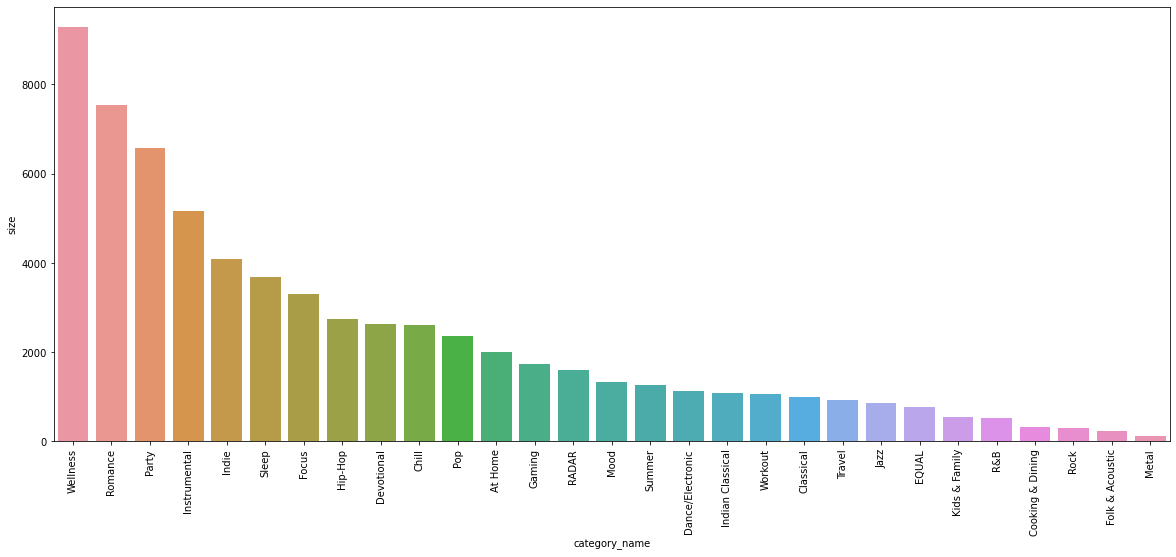

In [35]:
fig = plt.figure(figsize = (20, 8))


sns.barplot(data=data_groupby_cat.sort_values('size',ascending = False), x="category_name", y="size")
plt.xticks(rotation=90)
plt.show()


In [36]:
data_groupby_tracks = data.groupby(['track_id'],as_index=False).size()

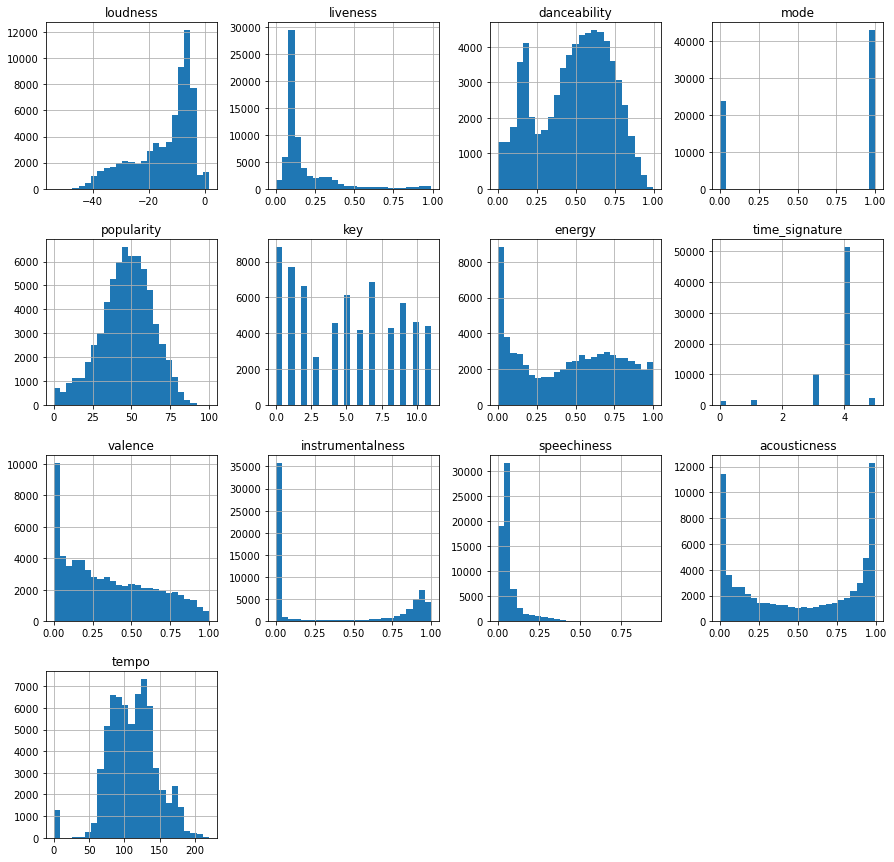

In [37]:
data.hist(bins=25, figsize=(15,15))
plt.show()

In [38]:
ordered_categories = data_groupby_cat['category_name'].to_numpy()

In [39]:
top_10_categories = ordered_categories[:10]

In [40]:
#'loudness','liveness','danceability','mode','popularity','key','energy','time_signature','valence','instrumentalness','speechiness','acousticness'
#tempo  = data.groupby(['category_name','tempo'],as_index=False).size()
#tempo
audio_features_values = pd.DataFrame(columns=['audio_feature','min','avg','max'])
for f in audio_features:
    audio_features_values.loc[f] = [f,data[f].min(),data[f].mean(),data[f].max()]
audio_features_values.reset_index(inplace=True,drop=True)
audio_features_values.set_index('audio_feature',inplace=True)

In [41]:
audio_features_values.T

audio_feature   loudness  liveness  danceability      mode  popularity  \
min           -53.814000   0.00000      0.000000  0.000000     0.00000   
avg           -14.273605   0.18287      0.488872  0.642629    46.38016   
max             1.511000   0.99100      0.998000  1.000000   100.00000   

audio_feature        key    energy  time_signature   valence  \
min             0.000000  0.000000        0.000000  0.000000   
avg             4.975518  0.455182        3.735073  0.359057   
max            11.000000  1.000000        5.000000  1.000000   

audio_feature  instrumentalness  speechiness  acousticness      tempo  
min                    0.000000      0.00000       0.00000    0.00000  
avg                    0.357298      0.07556       0.50936  111.34486  
max                    1.000000      0.94400       0.99600  220.02400

In [42]:
px.line(audio_features_values.T[sound_features])

In [43]:
top5_catdf= data.query("category_name in @top_10_categories")
top5_catdf.sample()

loudness  liveness  danceability  mode  popularity  key  energy  \
12087   -14.615    0.0796         0.377     1          26   11   0.393   

       time_signature  valence  instrumentalness  speechiness  acousticness  \
12087               4    0.455               0.0       0.0742         0.542   

        tempo      track_name                track_id category_name  
12087  97.552  Daachi Waaliya  1uBcSRrHdMrTwLIoBYoUMi         EQUAL

In [44]:
d = pd.DataFrame()

In [45]:
for c in ordered_categories:
    temp= data.query("category_name == @c")
    t = temp.nlargest(5,'popularity')
    d = pd.concat([d,t], ignore_index=True)

In [46]:
len(d)

145

In [47]:
fig = px.bar(d, x='category_name', y=['valence', 'energy', 'danceability', 'acousticness','speechiness','instrumentalness'], barmode='group',title = 'Category Name vs audio features')
fig.update_layout(
    autosize=False,
    width=900,
    height=900)
#fig.write_image("./images/fig1.png")
fig.show()

In [48]:
fig = px.bar(d, x='category_name', y=['popularity', 'tempo','loudness','key'], barmode='group',title = 'Category and audio features popularity,tempo,loudness,key')
fig.update_layout(
    autosize=False,
    width=900,
    height=900)
fig.show()

In [49]:
#px.histogram(data_groupby_cat, x="category_name",y='size',title = 'Number of instances per Categories').update_xaxes(categoryorder = 'total descending').show()
#fig.show()
#fig.write_image("./images/fig1.png")

#### Creating Dummy Columns for Each Category, also known as Hot Enconding

#### To save computing time saving the df_new as df_with_dummy_columns.

In [50]:
def prepareDataWithDummyColumns(df):
    df.category_name.unique()
    df.columns
    dummy = pd.get_dummies(df.category_name)
    dummy.sample()
    dummy
    trackids = df[['track_id']]

    df_merged = pd.merge(trackids, dummy, left_on=trackids.index,
                         right_on=dummy.index)
    df_merged.drop(['key_0'], axis=1, inplace=True)
    d = pd.DataFrame()
    d = df[[
        'loudness',
        'liveness',
        'danceability',
        'mode',
        'popularity',
        'key',
        'energy',
        'time_signature',
        'valence',
        'instrumentalness',
        'speechiness',
        'acousticness',
        'tempo',
        'track_name',
        'track_id',
        ]]
    d.sample()

    df_merged = pd.merge(trackids, dummy, left_on=trackids.index,
                         right_on=dummy.index)
    df_merged.drop(['key_0'], axis=1, inplace=True)
    df = pd.DataFrame()
    d = d[[
        'loudness',
        'liveness',
        'danceability',
        'mode',
        'popularity',
        'key',
        'energy',
        'time_signature',
        'valence',
        'instrumentalness',
        'speechiness',
        'acousticness',
        'tempo',
        'track_name',
        'track_id',
        ]]
    d

    d = pd.merge(d, df_merged, left_on=d.track_id,
                 right_on=df_merged.track_id)
    d.drop_duplicates(inplace=True, keep='first')
    d.reset_index(drop=True, inplace=True)
    d.drop(['key_0'], axis=1, inplace=True)
    d

    d.groupby(['track_id_x', 'track_id_y']).size()

    dummy.columns
    agg_functions = {
        'track_id_x': 'first',
        'track_name': 'first',
        'At Home': 'any',
        'Chill': 'any',
        'Classical': 'any',
        'Cooking & Dining': 'any',
        'Dance/Electronic': 'any',
        'Devotional': 'any',
        'EQUAL': 'any',
        'Focus': 'any',
        'Folk & Acoustic': 'any',
        'Gaming': 'any',
        'Hip-Hop': 'any',
        'Indian Classical': 'any',
        'Indie': 'any',
        'Instrumental': 'any',
        'Jazz': 'any',
        'Kids & Family': 'any',
        'Metal': 'any',
        'Mood': 'any',
        'Party': 'any',
        'Pop': 'any',
        'R&B': 'any',
        'RADAR': 'any',
        'Rock': 'any',
        'Romance': 'any',
        'Sleep': 'any',
        'Summer': 'any',
        'Travel': 'any',
        'Wellness': 'any',
        'Workout': 'any',
        'loudness': 'first',
        'liveness': 'first',
        'danceability': 'first',
        'mode': 'first',
        'popularity': 'first',
        'key': 'first',
        'energy': 'first',
        'time_signature': 'first',
        'valence': 'first',
        'instrumentalness': 'first',
        'speechiness': 'first',
        'acousticness': 'first',
        'tempo': 'first',
        }

    df_new = d.groupby(d['track_id_x']).aggregate(agg_functions)
    df_new.drop('track_id_x', inplace=True, axis=1)
    df_new.rename({'track_id_x': 'track_id'}, inplace=True)
    df_new['track_id'] = df_new.index
    df_new.reset_index(drop=True, inplace=True)
    df_new.sample()

    dum_col = [
        'At Home',
        'Chill',
        'Classical',
        'Cooking & Dining',
        'Dance/Electronic',
        'Devotional',
        'EQUAL',
        'Focus',
        'Folk & Acoustic',
        'Gaming',
        'Hip-Hop',
        'Indian Classical',
        'Indie',
        'Instrumental',
        'Jazz',
        'Kids & Family',
        'Metal',
        'Mood',
        'Party',
        'Pop',
        'R&B',
        'RADAR',
        'Rock',
        'Romance',
        'Sleep',
        'Summer',
        'Travel',
        'Wellness',
        'Workout',
        ]
    for col in dum_col:
        result = df_new[col].astype(int)
        df_new[col] = result
    return df_new

In [51]:
#df_new = prepareDataWithDummyColumns(df)
#df_new.to_csv("../data/tracks_with_dummy_columns.csv")

In [52]:
df_new = pd.read_csv("../data/tracks_with_dummy_columns.csv")

In [53]:
df_new.sample()

track_name  At Home  Chill  \
1859  Kaatrinile Varum - Sindhu Bhairavi - Chatusra ...        0      0   

      Classical  Cooking & Dining  Dance/Electronic  Devotional  EQUAL  Focus  \
1859          0                 0                 0           0      0      0   

      Folk & Acoustic  ...  popularity  key  energy  time_signature  valence  \
1859                0  ...          12    3    0.73               4    0.512   

      instrumentalness  speechiness  acousticness   tempo  \
1859            0.0811       0.0335          0.88  98.367   

                    track_id  
1859  0LR9pWfcEJIBxqhsWKb2K6  

[1 rows x 44 columns]

#### Each Track can belong to multiple categories/ labels, visualize max how many categories can a track be labeled ? 

In [54]:
rowSums = df_new[categories_list].sum(numeric_only=True,axis=1)
total = rowSums.to_numpy()
trackids = df_new['track_id'].to_numpy()

totaldf = pd.DataFrame({'trackid':trackids,'total_number_of_categories':total})
multiLabel_counts = totaldf.groupby('total_number_of_categories',as_index=False).size()
multiLabel_counts

total_number_of_categories   size
0                           1  26732
1                           2   8757
2                           3   3876
3                           4    984
4                           5    978
5                           6     68
6                           7    106
7                           8      2

 > Max is 8 but that is only 2 tracks, 7 has 106, 2 & 3 are more popular for multiple categories 

#### Adding "total_no_of_categories" to the data set

In [55]:
df_new['total_no_of_categories'] = rowSums
df_new.sample()

track_name  At Home  Chill  Classical  Cooking & Dining  \
5327  Over the Sea        0      0          0                 0   

      Dance/Electronic  Devotional  EQUAL  Focus  Folk & Acoustic  ...  key  \
5327                 0           0      0      0                0  ...   11   

      energy  time_signature  valence  instrumentalness  speechiness  \
5327   0.783               4    0.773               0.0       0.0484   

      acousticness    tempo                track_id  total_no_of_categories  
5327        0.0774  143.917  0yxq8tWNMnEuVLrubXpZuW                       1  

[1 rows x 45 columns]

In [74]:
tr = df_new[df_new['total_no_of_categories'] == 2]['track_id']
tempd = multidf.query('track_id in @tr')
cat_comb_2 = tempd.groupby('category_name',as_index=False).size().sort_values('size')

cat_comb_2

category_name  size
46      Kids & Family,Chill     1
49        Kids & Family,Pop     1
95             Romance,Rock     1
17   EQUAL,Dance/Electronic     1
74                  R&B,Pop     1
..                      ...   ...
9    Classical,Instrumental   371
106          Wellness,Focus   424
93              Romance,Pop   496
109   Wellness,Instrumental  1298
114          Wellness,Sleep  1389

[120 rows x 2 columns]

In [75]:
px.bar(cat_comb_2.query('size >20'),x='category_name',y='size',title = "Multiple Categories with 2 combinations")

Text(0, 0.5, 'Number of Tracks')

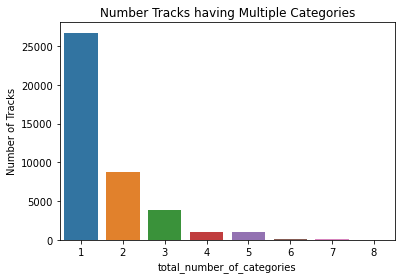

In [127]:
#dum_col
#rowSums = df_new[dum_col].sum(axis=1,numeric_only=True)
#multiLabel_counts = rowSums.value_counts()
#rs = rowSums.to_frame(name = 'total_no_of_categories')
#rs

#multiLabel_counts = multiLabel_counts.iloc[1:]
sns.barplot(x=multiLabel_counts['total_number_of_categories'],y= multiLabel_counts['size'])
plt.title("Number Tracks having Multiple Categories")
plt.ylabel('Number of Tracks')
#plt.xlabel('Number of Categories')

In [76]:
df_new.sample()

track_name  At Home  Chill  Classical  \
11151  Yaathonnum Parayathe - From "Vaashi"        0      0          0   

       Cooking & Dining  Dance/Electronic  Devotional  EQUAL  Focus  \
11151                 0                 0           0      0      0   

       Folk & Acoustic  ...  key  energy  time_signature  valence  \
11151                0  ...    9   0.256               4    0.473   

       instrumentalness  speechiness  acousticness   tempo  \
11151          0.000004       0.0897         0.855  93.992   

                     track_id  total_no_of_categories  
11151  23e7ArZoag0tLpBOlIuE9D                       1  

[1 rows x 45 columns]

### MAX, MIN, AVG for each category

In [77]:
avgFeatures = []
maxFeatures = []
minFeatures = []
for col in data.category_name.unique():
    catdf = data.query('category_name == @col')
    
    temp = (catdf.min(numeric_only=True).to_dict())
    temp['category'] = col
    temp['type'] = 'min'
    avgFeatures.append(temp)
    temp = catdf.mean(numeric_only=True).to_dict()
    temp['category'] = col
    temp['type'] =  'avg'
    avgFeatures.append(temp)

    temp = (catdf.max(numeric_only=True).to_dict())
    temp['category'] = col
    temp['type'] = 'max'
    avgFeatures.append(temp)

In [78]:
c = [avgFeatures,maxFeatures,minFeatures]
cat_audio_features = pd.DataFrame(data=avgFeatures)

In [79]:
cat_audio_features.sample()

loudness  liveness  danceability     mode  popularity       key    energy  \
7 -6.553613  0.193395      0.644883  0.48727   48.812116  5.501317  0.787865   

   time_signature   valence  instrumentalness  speechiness  acousticness  \
7        3.967515  0.363244          0.293173      0.06814      0.102699   

       tempo          category type  
7  124.62482  Dance/Electronic  avg

In [80]:
mean_data = cat_audio_features.groupby(['category'],as_index=False).mean()

In [81]:
px.histogram(mean_data, x='category', y=['valence', 'energy', 'danceability', 'acousticness','speechiness','instrumentalness'], barmode='group',title = 'Category Name vs audio features',marginal='box')

In [82]:
px.histogram(mean_data,x='category',y=['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence','speechiness'],
             labels=dict(category='categories',y='Value')).update_xaxes(categoryorder = 'total ascending')

In [83]:
#sns.pairplot(cat_audio_features[audio_features], height=1.8, aspect=1.8,
#                  plot_kws=dict(edgecolor="k", linewidth=0.5),
#                  diag_kind="kde", diag_kws=dict(shade=True))


In [142]:
## Standard Scaler processing to visualize.

#from sklearn.preprocessing import StandardScaler

#index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
#arr ={1:'Pop',2:'Party',3:'Dance/Electronic',4:'Rock',5:'R&B',6:'At Home',7:'Romance',8:'Chill',9:'Jazz',10:'Workout',11:'Hip-Hop',12:'Gaming',13:'Summer',14:'EQUAL',15:'Indie',16:'Mood',17:'Travel',18:'Indian Classical',19:'Devotional',20:'Wellness',21:'RADAR',22:'Classical',23:'Instrumental',24:'Sleep',25:'Focus',26:'Kids & Family',27:'Cooking & Dining',28:'Folk & Acoustic',29:'Metal'}
#arr1 = {'Pop':1,'Party':2,'Dance/Electronic':3,'Rock':4,'R&B':5,'At Home':6,'Romance':7,'Chill':8,'Jazz':9,'Workout':10,'Hip-Hop':11,'Gaming':12,'Summer':13,'EQUAL':14,'Indie':15,'Mood':16,'Travel':17,'Indian Classical':18,'Devotional':19,'Wellness':20,'RADAR':21,'Classical':22,'Instrumental':23,'Sleep':24,'Focus':25,'Kids & Family':26,'Cooking & Dining':27,'Folk & Acoustic':28,'Metal':29}
#ss = StandardScaler()

#scaled_df = ss.fit_transform(cat_audio_features[audio_features])
#scaled_df = pd.DataFrame(scaled_df, columns=audio_features)
#pd.concat([scaled_df,cat_audio_features[['category','type']]],axis=1)
#final_df = pd.concat([scaled_df, cat_audio_features[['category_id','category']]], axis=1)
#final_df.head()
#indices = []
#for a in cat_audio_features['category']:
#    indices.append(arr[a])
#cat_audio_features['category_id'] = indices
#cat_audio_features.sample()

In [ ]:
#fig = px.parallel_coordinates(final_df, color="category", labels={'category':'category','type':'type','liveness':'liveness','danceability':'danceability','mode':'mode','popularity':'popularity','key':'key','energy':'energy','time_signature':'time_signature','valence':'valence','instrumentalness':'instrumentalness','speechiness':'speechiness','acousticness':'acousticness'})

#px.parallel_coordinates(final_df,color='category_id',
#                              dimensions=['loudness','liveness','danceability','mode','popularity','key','energy','time_signature','valence','instrumentalness','speechiness','acousticness','tempo'], color_continuous_scale=px.colors.diverging.Tealrose,
#                              color_continuous_midpoint=2)

In [ ]:
#px.parallel_coordinates(final_df, color="category_id", labels={'category_id':'category','liveness':'liveness','danceability':'danceability','mode':'mode','popularity':'popularity','key':'key','energy':'energy','time_signature':'time_signature','valence':'valence','instrumentalness':'instrumentalness','speechiness':'speechiness','acousticness':'acousticness'},
#                        color_continuous_scale=px.colors.diverging.Tealrose,
#                             color_continuous_midpoint=2)


In [ ]:
#fig = plt.figure(figsize = (6, 4))
#title = fig.suptitle("Danceability", fontsize=7)
#fig.subplots_adjust(top=0.85, wspace=0.3)
#ax = fig.add_subplot(29,12, 12)
#ax.set_xlabel("category")
#ax.set_ylabel("danceability") 

#g = sns.FacetGrid(final_df, hue='category')
#g.map(sns.displot, 'danceability', kde=True, bins=15, ax=ax)
#ax.legend(title='danceability')
#plt.close(2)

In [84]:
#px.histogram(data.groupby(['category_name','popularity'],as_index=False).size(),x='popularity',color = 'category_name')

In [85]:
#px.scatter(data.groupby(['category_name','danceability'],as_index=False).size(),x='danceability',color='category_name')

In [86]:
import plotly.figure_factory as ff

hist_data = cat_audio_features.query("type == 'avg'")[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence','speechiness','category']]
hist_data.set_index('category',inplace=True,drop=True)
transposed = hist_data.T
fig = ff.create_distplot([transposed[c] for c in transposed.columns],transposed.columns,show_rug=False,show_hist=False, bin_size=.25)
fig.show()

In [87]:
import plotly.figure_factory as ff

hist_data = cat_audio_features.query("type == 'avg'")[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence','speechiness','category']]
hist_data.set_index('category',inplace=True,drop=True)
#transposed = hist_data.T
fig = ff.create_distplot([hist_data[c] for c in hist_data.columns],hist_data.columns,show_rug=False,show_hist=False, bin_size=.25)
fig.show()

### Correlation Matrix for Categories / Labels

In [88]:
corr = df_new.corr().iloc[:29,:29]

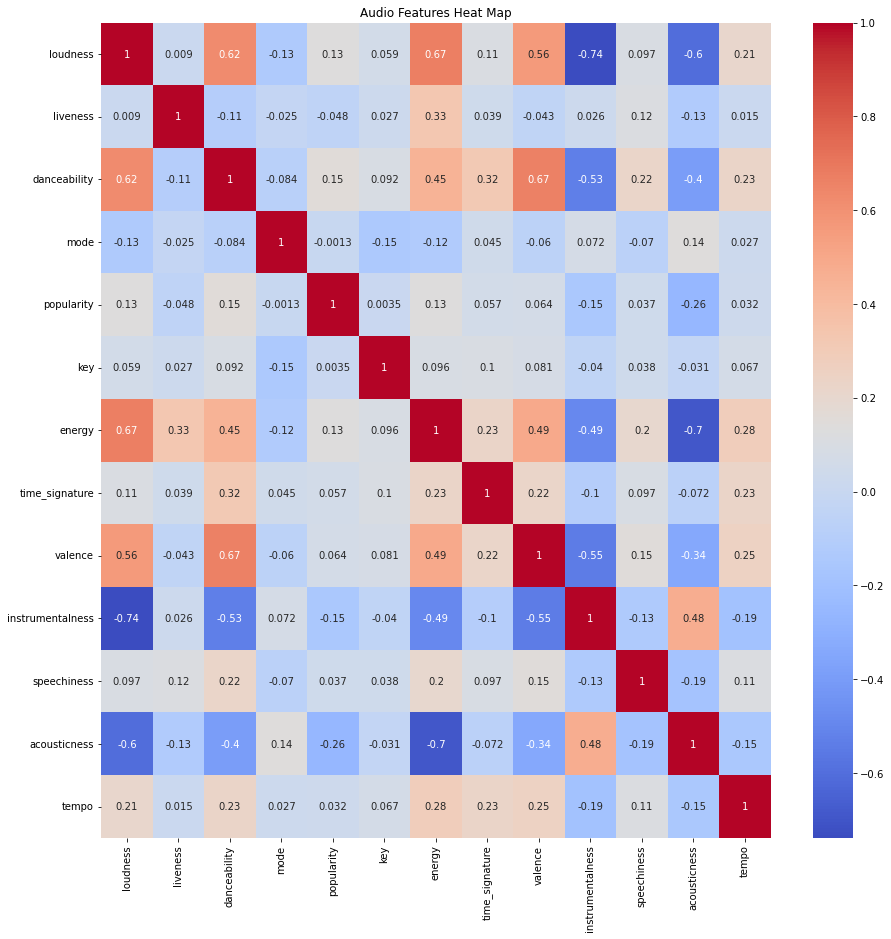

In [89]:
plt.figure(figsize=(15,15))
sns.heatmap(df_new[audio_features].corr(),annot=True,cmap='coolwarm')
plt.title("Audio Features Heat Map")
plt.show()


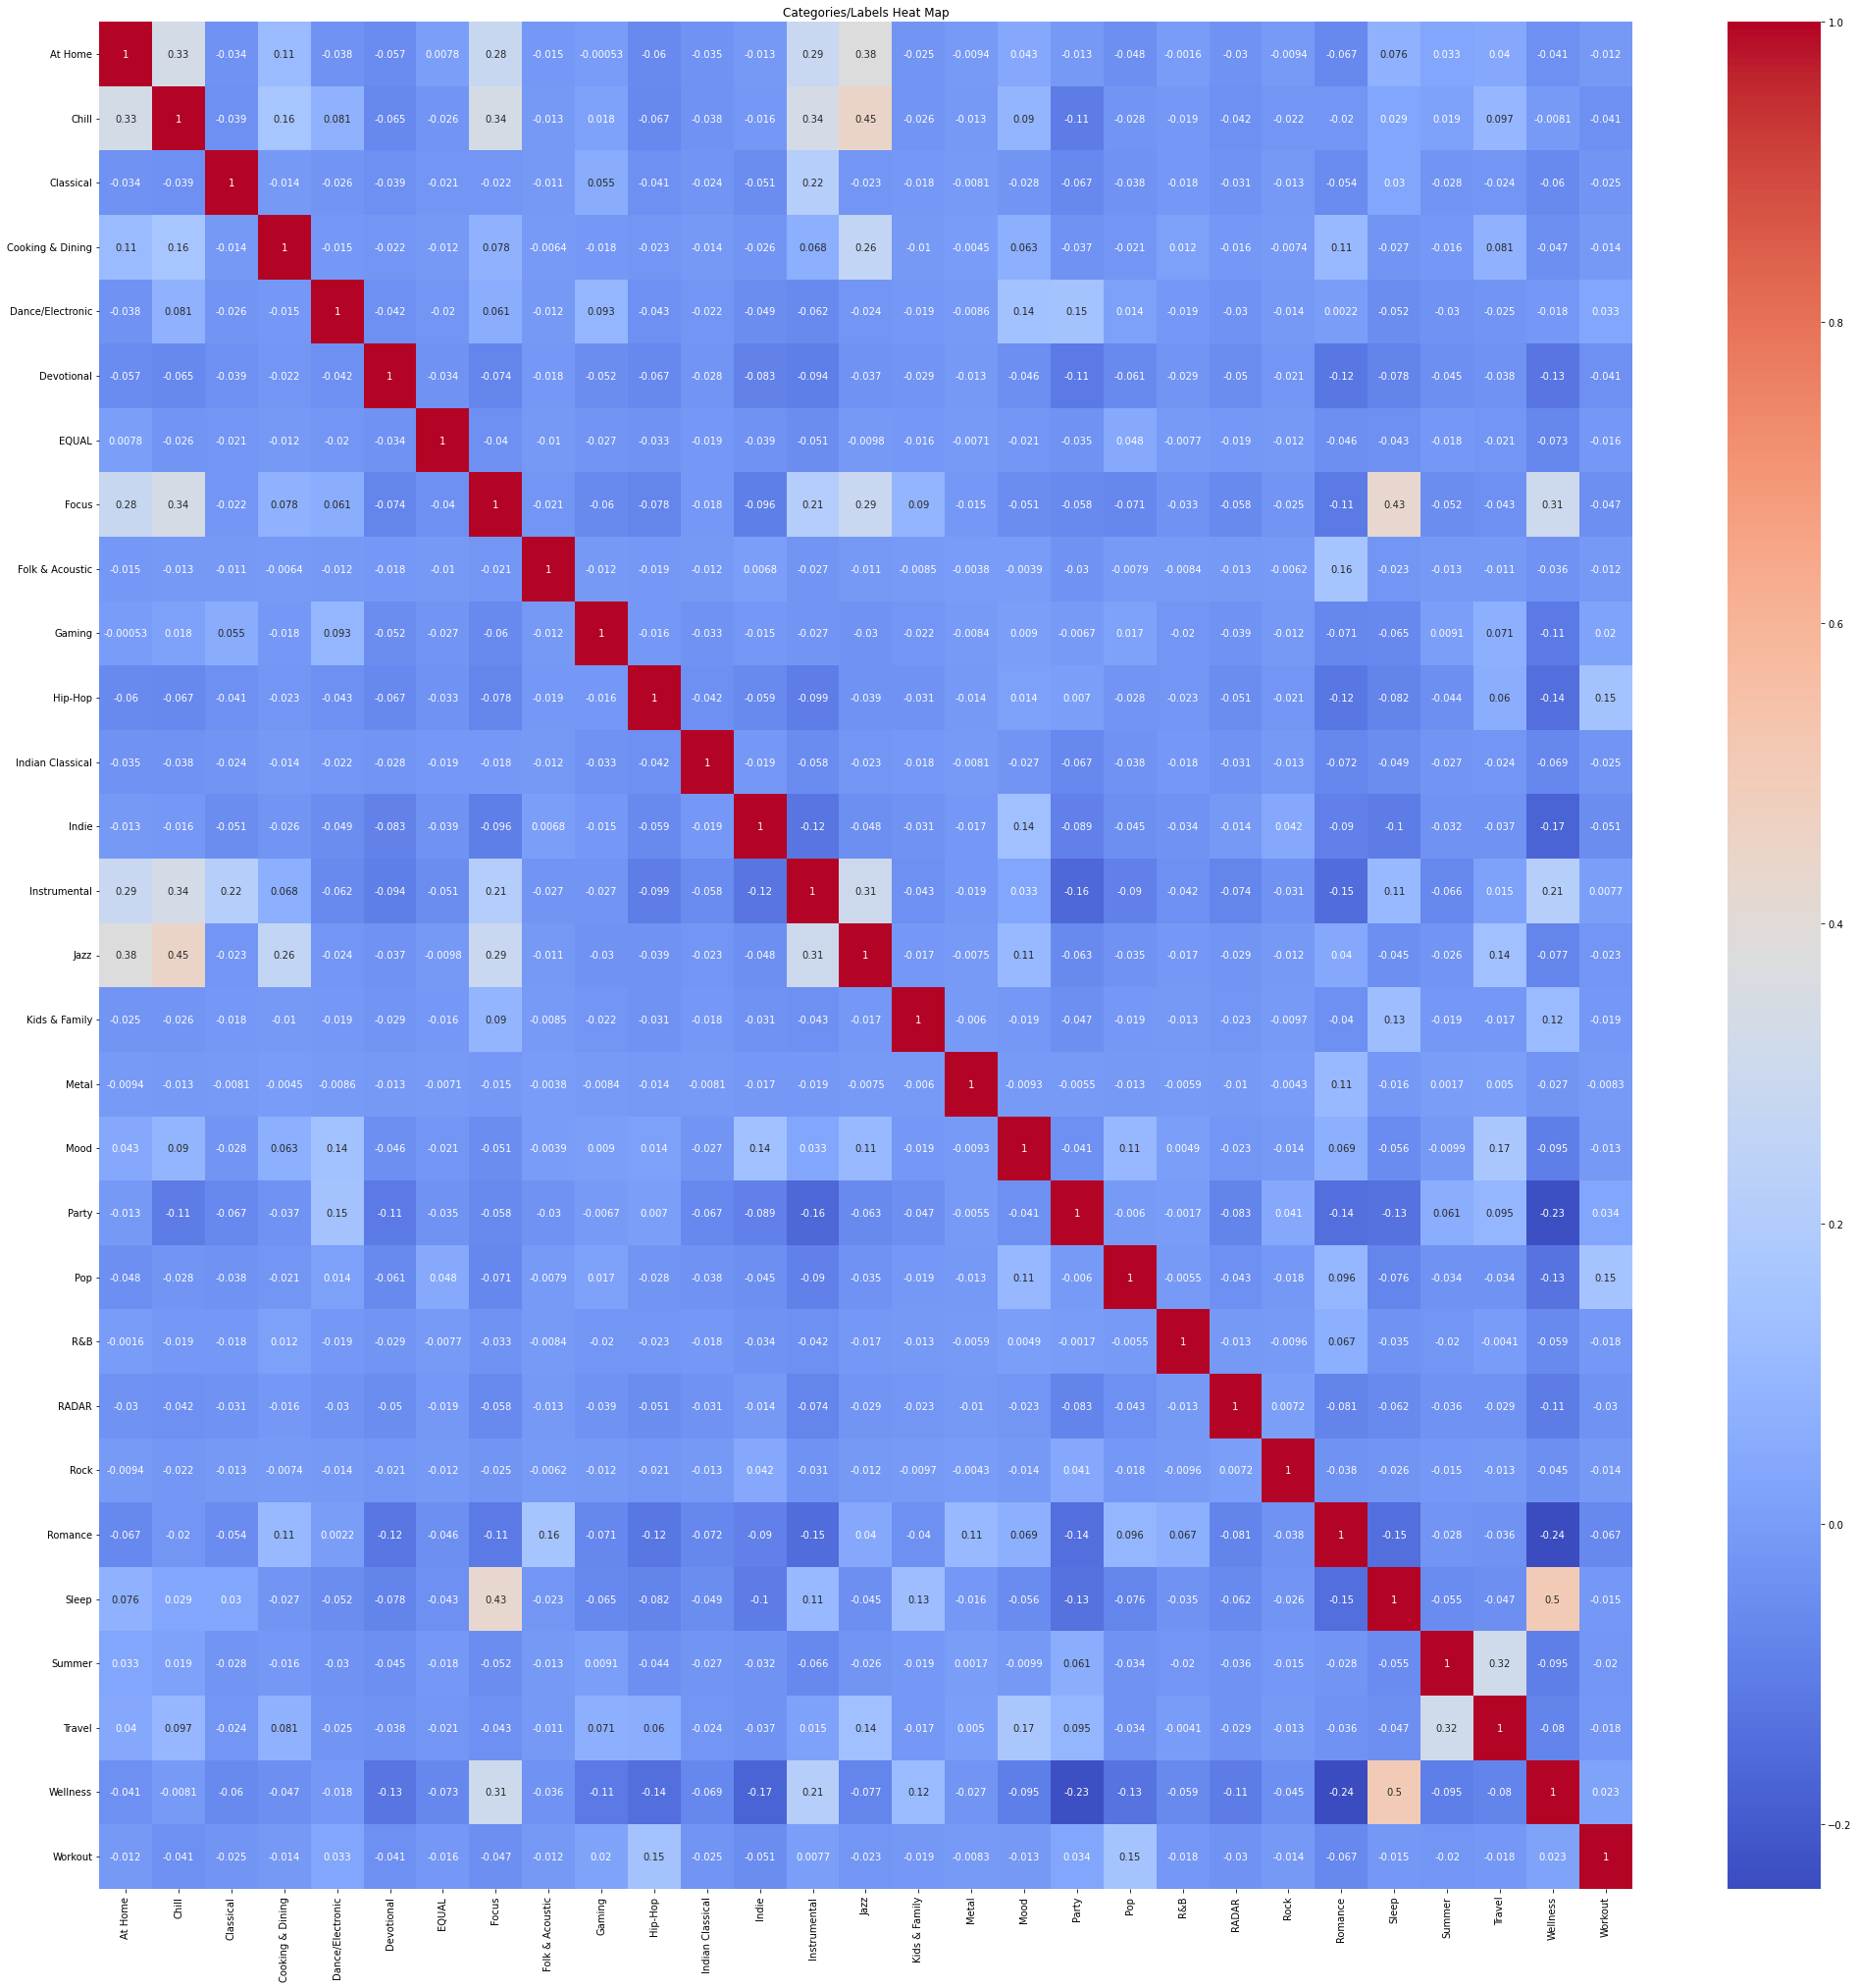

In [90]:
plt.figure(figsize=(35,35))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Categories/Labels Heat Map")
plt.show()


### Verify Gaming and Devotional don't go together

In [91]:
df_new.query('Gaming == 1 and Devotional == 1')

Empty DataFrame
Columns: [track_name, At Home, Chill, Classical, Cooking & Dining, Dance/Electronic, Devotional, EQUAL, Focus, Folk & Acoustic, Gaming, Hip-Hop, Indian Classical, Indie, Instrumental, Jazz, Kids & Family, Metal, Mood, Party, Pop, R&B, RADAR, Rock, Romance, Sleep, Summer, Travel, Wellness, Workout, loudness, liveness, danceability, mode, popularity, key, energy, time_signature, valence, instrumentalness, speechiness, acousticness, tempo, track_id, total_no_of_categories]
Index: []

[0 rows x 45 columns]

### Verify Classical and Hip-Hop don't go together

In [92]:
df_new.query('Classical == 1 and `Hip-Hop` == 1')

Empty DataFrame
Columns: [track_name, At Home, Chill, Classical, Cooking & Dining, Dance/Electronic, Devotional, EQUAL, Focus, Folk & Acoustic, Gaming, Hip-Hop, Indian Classical, Indie, Instrumental, Jazz, Kids & Family, Metal, Mood, Party, Pop, R&B, RADAR, Rock, Romance, Sleep, Summer, Travel, Wellness, Workout, loudness, liveness, danceability, mode, popularity, key, energy, time_signature, valence, instrumentalness, speechiness, acousticness, tempo, track_id, total_no_of_categories]
Index: []

[0 rows x 45 columns]